In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import matplotlib.lines as mlines

In [2]:
import seaborn as sns  
sns.set_style("white", {'axes.grid' : False})
sns.set_context("paper", font_scale=3.0, rc={"lines.linewidth": 2.} )
sns.set_palette("Set1", 8, .75) 
sns.set_style('ticks') 
# palette = plt.get_cmap('tab20b')

In [3]:
colors = {'eta':'#0D47A1','eta0':'#82B1FF','eta_nc':'#311B92','bptf':'#B71C1C','mt':'#2E7D32', 'leiden': '#FFA726', 'r_dirichlet':'indianred', 'r_gamma':'plum'}
Labels = {'eta': 'CRep', 'eta_nc': r'CRep$_{nc}$', 'eta0': r'CRep$_0$', 'mt': 'MT', 'bptf': 'BPMF', 'leiden': 'Leiden'}

algos = ['eta', 'eta_nc', 'eta0', 'mt', 'bptf', 'leiden', 'r_dirichlet', 'r_gamma']
markers = {'eta':'v', 'eta0':'^', 'eta_nc':'<', 'bptf':'d', 'mt':'>', 'leiden': 'D'}

In [4]:
cs = 3
ms = 150

/Users/mcontisciani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mcontisciani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mcontisciani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mcontisciani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mcontisciani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mcontisciani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/mcontisciani/op

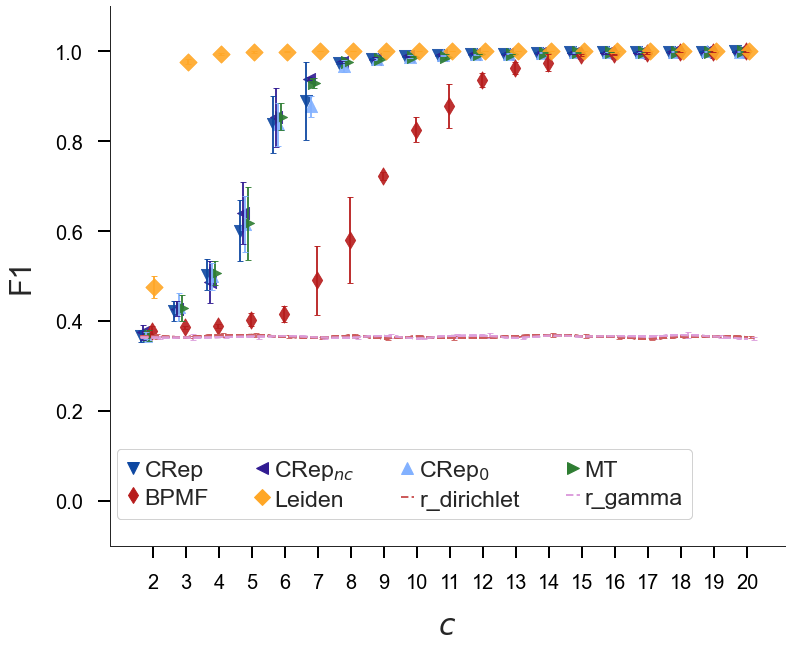

In [5]:
xtics = {'k': range(2, 21)}
# xlabel = {'k':r'$\langle k \rangle$'}
xlabel = {'k':r'$c$'}

for pn_name in ['k']:
    for m_name in ['F1']:
        fig, axs = plt.subplots(1,1, figsize=(12, 10), sharex=True, sharey=False) 
        plt.rcParams.update({'font.family': 'Arial'})
        plt.rcParams.update({'font.size': 40})   
        
        l_act = 0
        
        D = len(algos)
        if pn_name=='k':
            Dx = .75
        else: 
            Dx = .075
        dx = Dx/float(D+1)
        x0 = -Dx*0.5

        for e in xtics[pn_name]:
            for j, algo in enumerate(algos):  
                res = pd.read_csv('../data/results_communities_sbm/'+algo+'/'+pn_name+'/comparison_'+pn_name+'.csv')
                model = res[res['network']==algo]
                assert(len(res)==len(model))
                if l_act == 0:
                    for el in model.groupby(by=pn_name):
                        if len(el[1])!=3:
                            print(el)
                algo_avg = model.groupby(by=pn_name).mean().reset_index()
                algo_std = model.groupby(by=pn_name).std().reset_index()
                
                if algo.startswith('r_'):
                    xx = [algo_avg.index[0]+2+x0] + list(algo_avg.index[1:]+2)
                    axs.plot(xx, algo_avg[m_name], c=colors[algo], alpha=0.90, linestyle='--') 
                else:
                    axs.scatter(float(e)+j*dx+x0, algo_avg[algo_avg[pn_name]==e][m_name], c=colors[algo], alpha=0.90, 
                    marker=markers[algo], s=ms)
                axs.errorbar(float(e)+j*dx+x0, algo_avg[algo_avg[pn_name]==e][m_name], algo_std[algo_std[pn_name]==e][m_name], 
                     c=colors[algo], alpha=0.90, capsize=cs)           
            l_act+=1
                
            axs.tick_params(axis='x', which='both', bottom=True, top=False,
            labelbottom=True, size=12, width=2, direction='out', pad=15, colors='black')
            axs.tick_params(axis='y', which='both', bottom=True, top=False,
            labelbottom=True, size=12, width=2, direction='out', pad=15, colors='black')

            axs.set_ylabel(m_name, fontsize=30, labelpad=20)
        #    axs.set_ylabel(r'$\mathsf{r}$', fontsize=30, labelpad=20)
            axs.set_ylim([-0.1, 1.1])
            axs.set_yticklabels([0.0, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
            axs.set_xticks(xtics[pn_name])
            axs.set_xticklabels(xtics[pn_name], fontsize=20)
            axs.set_xlabel(xlabel[pn_name], fontsize=30, labelpad=20)
            
        
        crep = mlines.Line2D([], [], color=colors['eta'], marker=markers['eta'], linestyle='None', 
                             markersize=11.5, label=Labels['eta'])
        crep0 = mlines.Line2D([], [], color=colors['eta0'], marker=markers['eta0'], linestyle='None', 
                             markersize=11.5, label=Labels['eta0'])
        crepnc = mlines.Line2D([], [], color=colors['eta_nc'], marker=markers['eta_nc'], linestyle='None', 
                             markersize=11.5, label=Labels['eta_nc'])
        mt = mlines.Line2D([], [], color=colors['mt'], marker=markers['mt'], linestyle='None', 
                             markersize=11.5, label=Labels['mt'])
        bptf = mlines.Line2D([], [], color=colors['bptf'], marker=markers['bptf'], linestyle='None', 
                             markersize=11.5, label=Labels['bptf'])
        leiden = mlines.Line2D([], [], color=colors['leiden'], marker=markers['leiden'], linestyle='None', 
                               markersize=11.5, label=Labels['leiden'])
        rdir = mlines.Line2D([], [], color=colors['r_dirichlet'], linestyle='--', markersize=11.5, label='r_dirichlet')
        rgam = mlines.Line2D([], [], color=colors['r_gamma'], linestyle='--', markersize=11.5, label='r_gamma')
        legend1 = plt.legend(handles=[crep, bptf, crepnc, leiden, crep0, rdir, mt, rgam],
                            bbox_to_anchor=(0.01,0.05), loc='lower left', shadow=False, fontsize='xx-small',
                      handlelength=0.6, handletextpad=0.2, framealpha=1, labelspacing=0.3,
                      numpoints=1, markerscale=1, borderaxespad=0., ncol=4)
        fig.add_artist(legend1)

        fig.subplots_adjust(hspace=.01, wspace=.8) 
        plt.tight_layout()
        sns.despine(top=True, right=True)   
        plt.rcParams['axes.linewidth'] = 1.5
        plt.rc('axes', edgecolor='k')
        plt.savefig('../data/results_communities_sbm/'+m_name+'_'+pn_name+'.png', bbox_inches='tight', dpi=300)

### Plot

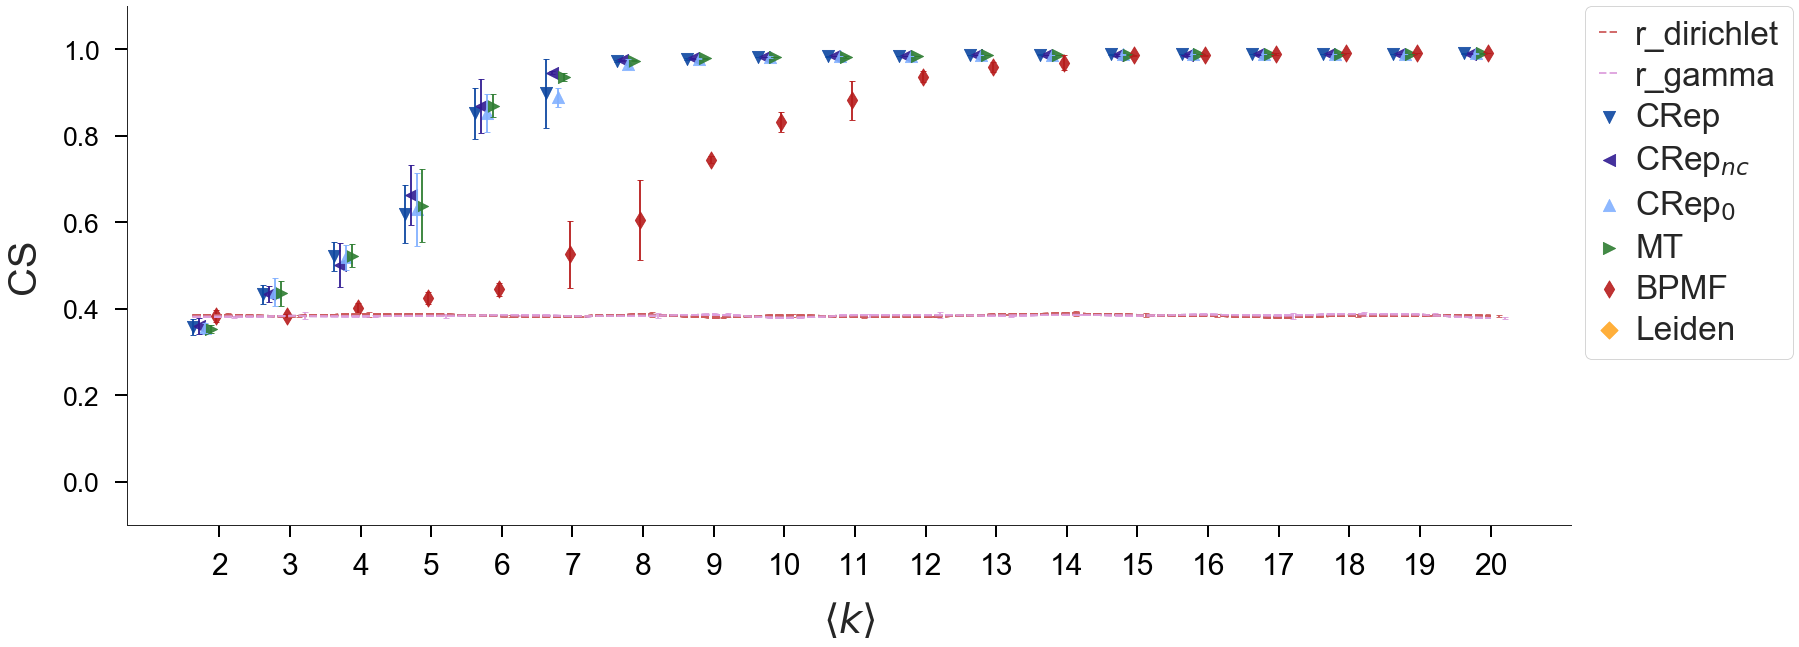

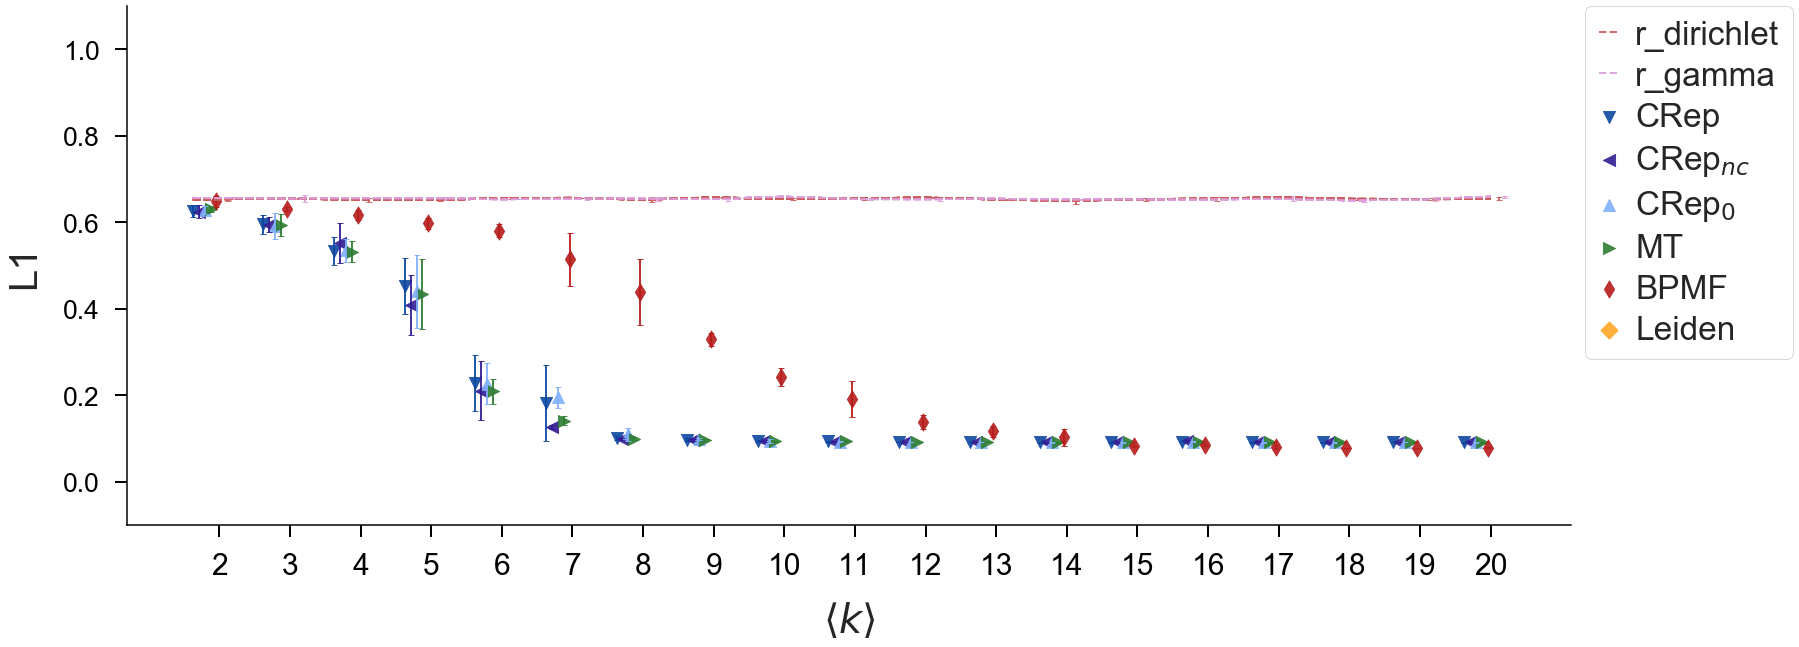

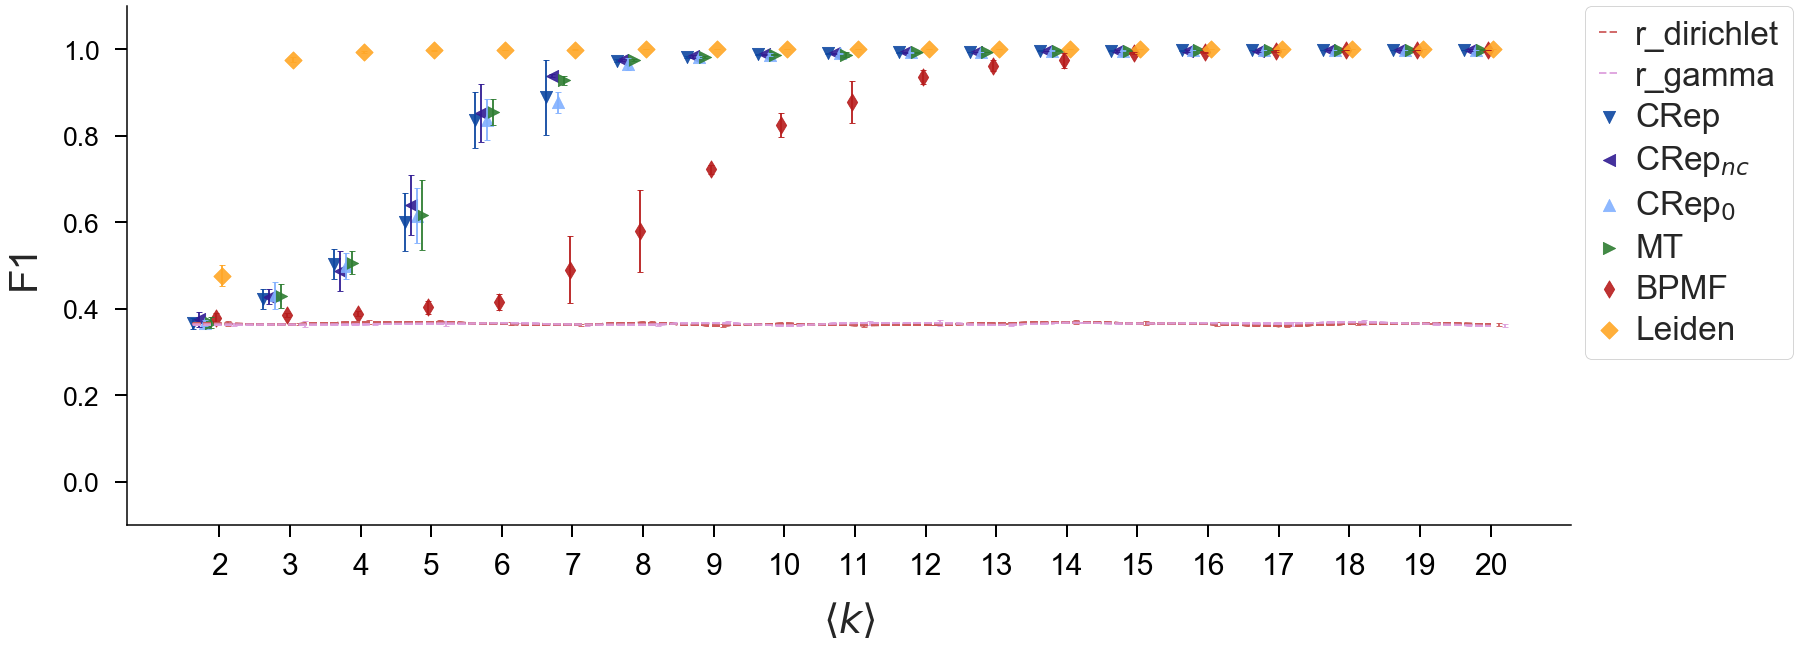

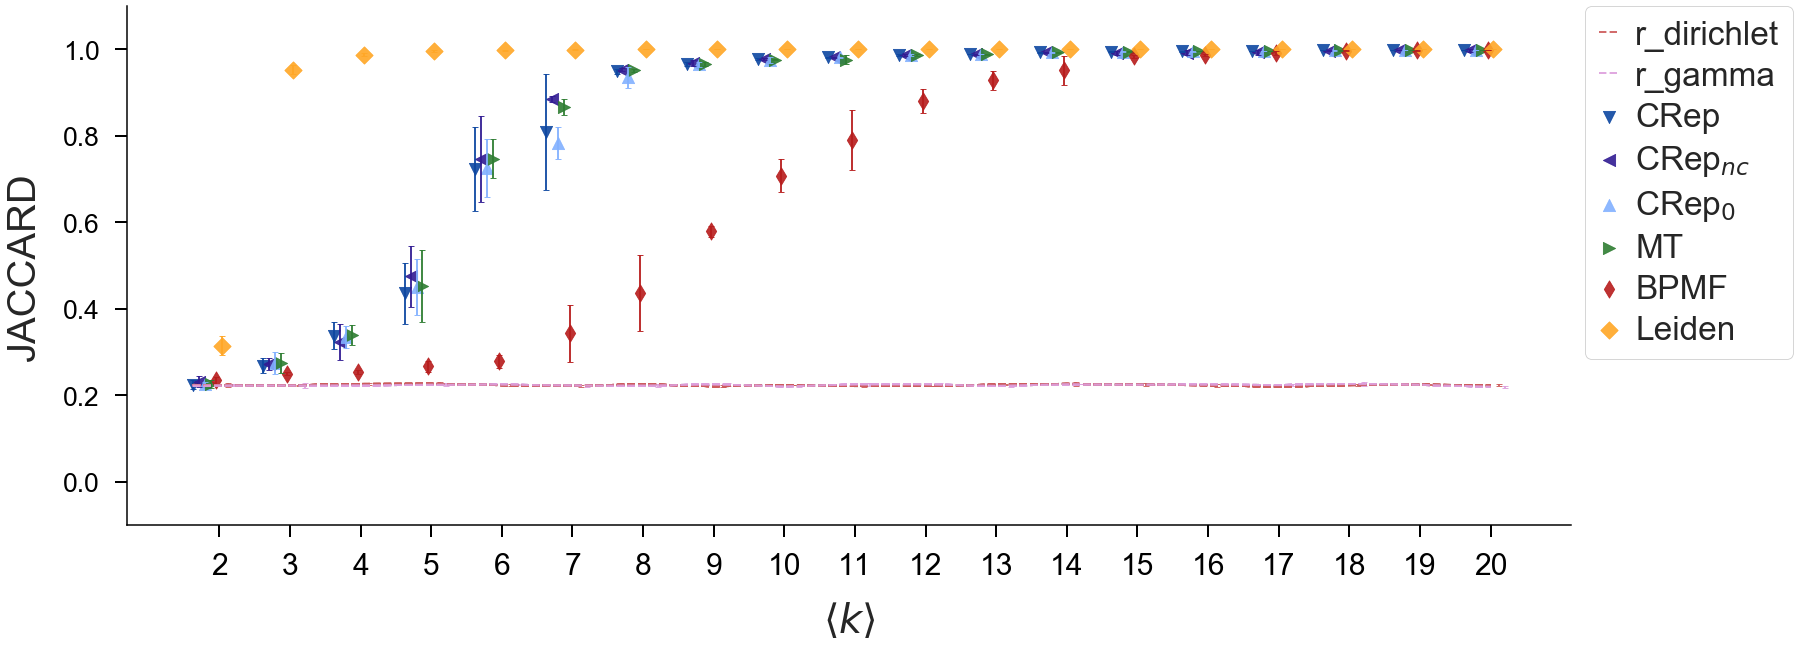

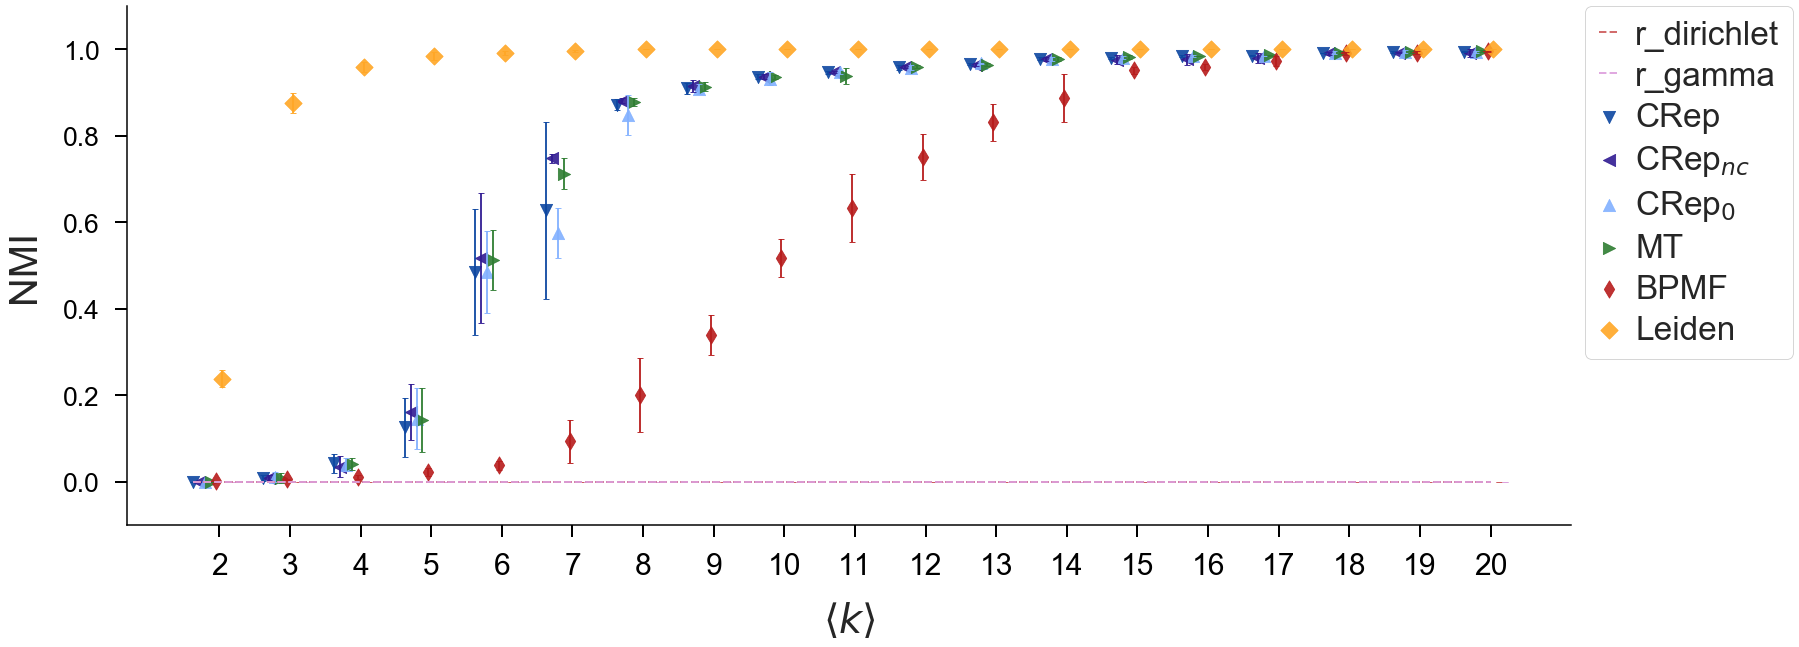

In [5]:
xtics = {'k': range(2, 21)}
xlabel = {'k':r'$\langle k \rangle$'}

for pn_name in ['k']:
    for m_name in ['CS', 'L1', 'F1', 'JACCARD', 'NMI']:
        fig, axs = plt.subplots(1,1, figsize=(26, 10), sharex=True, sharey=False) 
        plt.rcParams.update({'font.family': 'Arial'})
        plt.rcParams.update({'font.size': 40})   
        
        l_act = 0
        
        D = len(algos)
        if pn_name=='k':
            Dx = .75
        else: 
            Dx = .05
        dx = Dx/float(D+1)
        x0 = -Dx*0.5

        for e in xtics[pn_name]:
            for j, algo in enumerate(algos):  
                res = pd.read_csv('../data/results_communities_sbm/'+algo+'/'+pn_name+'/comparison_'+pn_name+'.csv')
                model = res[res['network']==algo]
                assert(len(res)==len(model))
                if l_act == 0:
                    for el in model.groupby(by=pn_name):
                        if len(el[1])!=3:
                            print(el)
                algo_avg = model.groupby(by=pn_name)[m_name].mean()
                algo_std = model.groupby(by=pn_name)[m_name].std()   
                if l_act == 0:
                    if algo.startswith('r_'):
                        xx = [algo_avg.index[0]+x0] + list(algo_avg.index[1:])
                        axs.plot(xx, algo_avg, c=colors[algo], label=algo, alpha=0.90, linestyle='--') 
                    else:
                        axs.scatter(float(e)+j*dx+x0, algo_avg[e], c=colors[algo], alpha=0.90, label=Labels[algo], marker=markers[algo], s=ms)
                else:
                    if algo.startswith('r_'):
                        xx = [algo_avg.index[0]+x0] + list(algo_avg.index[1:])
                        axs.plot(xx, algo_avg, c=colors[algo], alpha=0.90, linestyle='--') 
                    else:
                        axs.scatter(float(e)+j*dx+x0, algo_avg[e], c=colors[algo], alpha=0.90, marker=markers[algo], s=ms)
                axs.errorbar(float(e)+j*dx+x0, algo_avg[e], algo_std[e], c=colors[algo], alpha=0.90, capsize=cs)           

            l_act+=1
            
            axs.tick_params(axis='x', which='both', bottom=True, top=False,
            labelbottom=True, size=12, width=2, direction='out', pad=15, colors='black')
            axs.tick_params(axis='y', which='both', bottom=True, top=False,
            labelbottom=True, size=12, width=2, direction='out', pad=15, colors='black')

            axs.set_ylabel(m_name, fontsize=40, labelpad=20)
            axs.set_ylim([-0.1, 1.1])
            axs.set_xticks(xtics[pn_name])
            axs.set_xticklabels(xtics[pn_name], fontsize=30)
            axs.set_xlabel(xlabel[pn_name], fontsize=40, labelpad=20)
            
        
        handles, labels = axs.get_legend_handles_labels()
        axs.legend(handles,labels, bbox_to_anchor=(1.01,1), loc='upper left', shadow=False, fontsize='small',
              handlelength=0.6, handletextpad=0.5, framealpha=1, labelspacing=0.3,
              numpoints=1, markerscale=1, borderaxespad=0.)

        fig.subplots_adjust(hspace=.01, wspace=.8) 
        plt.tight_layout()
        sns.despine(top=True, right=True)   
        plt.rcParams['axes.linewidth'] = 1.5
        plt.rc('axes', edgecolor='k')
        plt.savefig('../data/results_communities_sbm/'+m_name+'_'+pn_name+'.png', bbox_inches='tight', dpi=300)